In [1]:
import cv2
import typing
import numpy as np

from mltu.inferenceModel import OnnxInferenceModel
from mltu.utils.text_utils import ctc_decoder, get_cer
import pandas as pd
from tqdm import tqdm
from mltu.configs import BaseModelConfigs
import matplotlib.pyplot as plt

In [2]:

class ImageToWordModel(OnnxInferenceModel):
    def __init__(self, char_list: typing.Union[str, list], *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.char_list = char_list

    def predict(self, image: np.ndarray):
        image = cv2.resize(image, self.input_shape[:2][::-1])

        image_pred = np.expand_dims(image, axis=0).astype(np.float32)

        preds = self.model.run(None, {self.input_name: image_pred})[0]

        text = ctc_decoder(preds, self.char_list)[0]

        return text

In [3]:
configs = BaseModelConfigs.load("/home/tuandinh/Desktop/Captra_projects/Models/02_captcha_to_text/202310071959/configs.yaml")

model = ImageToWordModel(model_path=configs.model_path, char_list=configs.vocab)

df = pd.read_csv("/home/tuandinh/Desktop/Captra_projects/Models/02_captcha_to_text/202310071959/val.csv").values.tolist()

accum_cer = []
result_prediction = []

for image_path, label in tqdm(df):
    image = cv2.imread(image_path)

    prediction_text = model.predict(image)
    result_prediction.append(prediction_text)
    cer = get_cer(prediction_text, label)
    print(f"Image: {image_path}, Label: {label}, Prediction: {prediction_text}, CER: {cer}")

    accum_cer.append(cer)

print(f"Average CER: {np.average(accum_cer)}")

 40%|████      | 42/104 [00:00<00:00, 208.24it/s]

Image: /home/tuandinh/Desktop/Captra_projects/Dataset/captcha_images_v2/deneb.png, Label: deneb, Prediction: deneb, CER: 0.0
Image: /home/tuandinh/Desktop/Captra_projects/Dataset/captcha_images_v2/5mgn4.png, Label: 5mgn4, Prediction: 5mgn4, CER: 0.0
Image: /home/tuandinh/Desktop/Captra_projects/Dataset/captcha_images_v2/8np22.png, Label: 8np22, Prediction: 8np22, CER: 0.0
Image: /home/tuandinh/Desktop/Captra_projects/Dataset/captcha_images_v2/8d4wm.png, Label: 8d4wm, Prediction: 8d4wm, CER: 0.0
Image: /home/tuandinh/Desktop/Captra_projects/Dataset/captcha_images_v2/d2nbn.png, Label: d2nbn, Prediction: d2nbn, CER: 0.0
Image: /home/tuandinh/Desktop/Captra_projects/Dataset/captcha_images_v2/cfw6e.png, Label: cfw6e, Prediction: cfw6e, CER: 0.0
Image: /home/tuandinh/Desktop/Captra_projects/Dataset/captcha_images_v2/g3ex3.png, Label: g3ex3, Prediction: g3ex3, CER: 0.0
Image: /home/tuandinh/Desktop/Captra_projects/Dataset/captcha_images_v2/f85y3.png, Label: f85y3, Prediction: f85y3, CER: 0.0


 84%|████████▎ | 87/104 [00:00<00:00, 215.82it/s]

Image: /home/tuandinh/Desktop/Captra_projects/Dataset/captcha_images_v2/2g7nm.png, Label: 2g7nm, Prediction: 2g7nm, CER: 0.0
Image: /home/tuandinh/Desktop/Captra_projects/Dataset/captcha_images_v2/8n65n.png, Label: 8n65n, Prediction: 8n65n, CER: 0.0
Image: /home/tuandinh/Desktop/Captra_projects/Dataset/captcha_images_v2/cy3nw.png, Label: cy3nw, Prediction: cy3nw, CER: 0.0
Image: /home/tuandinh/Desktop/Captra_projects/Dataset/captcha_images_v2/gny6b.png, Label: gny6b, Prediction: gny6b, CER: 0.0
Image: /home/tuandinh/Desktop/Captra_projects/Dataset/captcha_images_v2/44c22.png, Label: 44c22, Prediction: 44c22, CER: 0.0
Image: /home/tuandinh/Desktop/Captra_projects/Dataset/captcha_images_v2/4fc36.png, Label: 4fc36, Prediction: 4fc36, CER: 0.0
Image: /home/tuandinh/Desktop/Captra_projects/Dataset/captcha_images_v2/c3572.png, Label: c3572, Prediction: c3572, CER: 0.0
Image: /home/tuandinh/Desktop/Captra_projects/Dataset/captcha_images_v2/gfxcc.png, Label: gfxcc, Prediction: gfxcc, CER: 0.0


100%|██████████| 104/104 [00:00<00:00, 191.21it/s]

Image: /home/tuandinh/Desktop/Captra_projects/Dataset/captcha_images_v2/574d7.png, Label: 574d7, Prediction: 574d7, CER: 0.0
Image: /home/tuandinh/Desktop/Captra_projects/Dataset/captcha_images_v2/p24gn.png, Label: p24gn, Prediction: p24gn, CER: 0.0
Image: /home/tuandinh/Desktop/Captra_projects/Dataset/captcha_images_v2/6c3n6.png, Label: 6c3n6, Prediction: 6c3n6, CER: 0.0
Image: /home/tuandinh/Desktop/Captra_projects/Dataset/captcha_images_v2/f75cx.png, Label: f75cx, Prediction: f75cx, CER: 0.0
Image: /home/tuandinh/Desktop/Captra_projects/Dataset/captcha_images_v2/b3xpn.png, Label: b3xpn, Prediction: b3xpn, CER: 0.0
Image: /home/tuandinh/Desktop/Captra_projects/Dataset/captcha_images_v2/wce5n.png, Label: wce5n, Prediction: wce5n, CER: 0.0
Image: /home/tuandinh/Desktop/Captra_projects/Dataset/captcha_images_v2/bnc2f.png, Label: bnc2f, Prediction: bnc2f, CER: 0.0
Image: /home/tuandinh/Desktop/Captra_projects/Dataset/captcha_images_v2/2nbcx.png, Label: 2nbcx, Prediction: 2nbcx, CER: 0.0


In [4]:
data = pd.read_csv("/home/tuandinh/Desktop/Captra_projects/Models/02_captcha_to_text/202310071959/val.csv")
data.shape
data_visulization = data.head(16)
data_visulization = np.array(data_visulization)

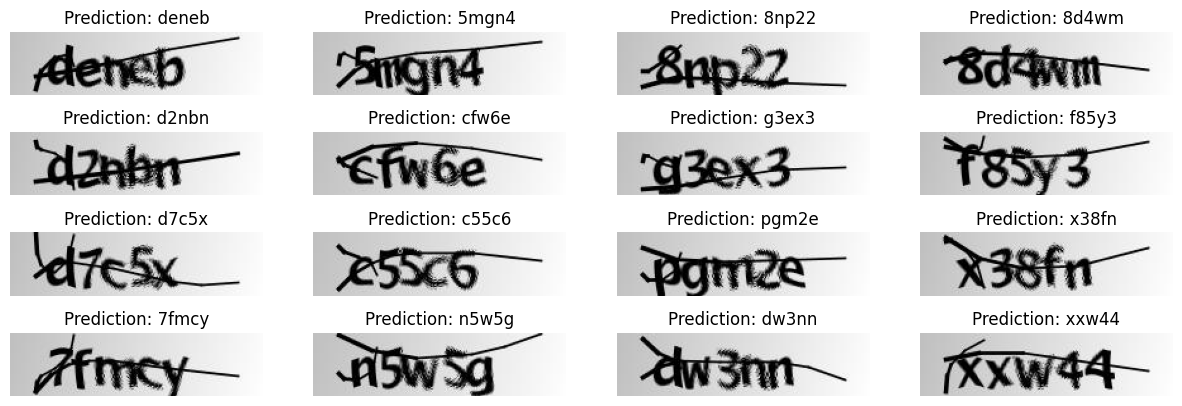

In [5]:
image_paths = data_visulization[:, 0]
count  = 0
_, ax = plt.subplots(4,4, figsize=(15, 5))

for i in range(len(image_paths)):
    path = image_paths[i]
    image = cv2.imread(path)
    pred_texts = model.predict(image)
    title = f"Prediction: {pred_texts}"
    ax[i // 4, i % 4].imshow(image, cmap="gray")
    ax[i // 4, i % 4].set_title(title)
    ax[i // 4, i % 4].axis("off")